['subject11.surprised.gif', 'subject06.normal.gif', 'subject06.rightlight.gif', 'subject01.surprised.gif', 'subject07.glasses.gif', 'subject10.wink.gif', 'subject11.leftlight.gif', 'subject07.sad.gif', 'subject15.glasses.gif', 'subject07.noglasses.gif', 'subject14.wink.gif', 'subject14.sleepy.gif', 'subject12.sad.gif', 'subject05.rightlight.gif', 'subject14.rightlight.gif', 'subject12.noglasses.gif', 'subject04.glasses.gif', 'subject01.rightlight.gif', 'subject11.sleepy.gif', 'subject14.centerlight.gif', 'subject13.happy.gif', 'subject05.leftlight.gif', 'subject09.sleepy.gif', 'subject13.noglasses.gif', 'subject03.sad.gif', 'subject06.centerlight.gif', 'subject02.surprised.gif', 'subject13.glasses.gif', 'subject10.glasses.gif', 'subject01.glasses.gif', 'subject03.normal.gif', 'subject09.wink.gif', 'subject08.wink.gif', 'subject03.surprised.gif', 'subject15.happy.gif', 'subject09.leftlight.gif', 'subject15.surprised.gif', 'subject05.normal.gif', 'subject10.rightlight.gif', 'subject06.wi

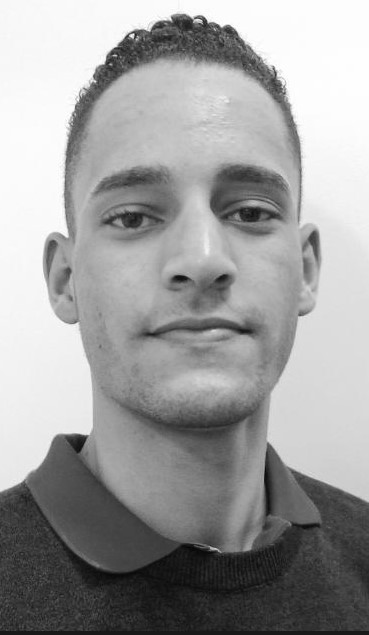

(635, 369)
[[[[0.         1.         0.99998343 ... 0.10279772 0.818712
    0.6728169 ]
   [0.         1.         0.13221578 ... 3.0131912  5.527132
    5.9342337 ]
   [0.         1.         0.12626737 ... 0.37504315 2.955141
    2.611146  ]
   ...
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]
   [0.         0.         0.         ... 0.         0.
    0.        ]]]]


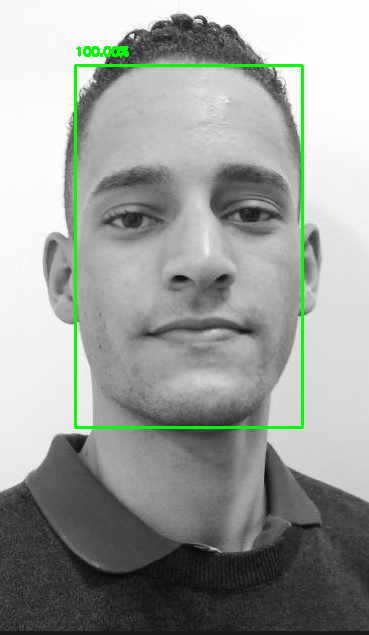

(635, 369, 3)


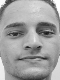

(80, 60)


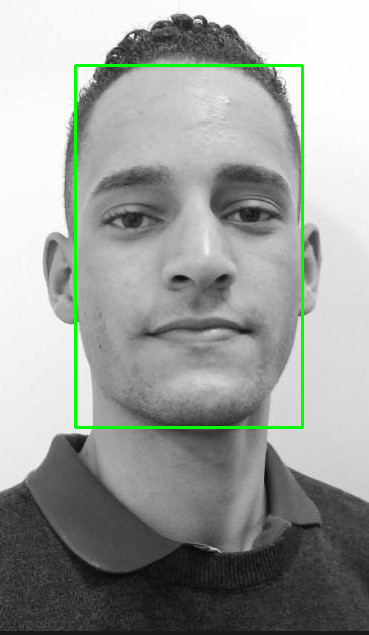

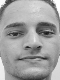

In [4]:
import cv2
import numpy as np
from PIL import Image
from google.colab.patches import cv2_imshow

#Extrair o zip

import zipfile
path = '/content/yalefaces.zip'
zip_object = zipfile.ZipFile(file=path, mode = 'r')
zip_object.extractall('./')
zip_object.close()

# Listando os arquivos no diretorio de treino

import os
print(os.listdir('/content/yalefaces/train'))

#Abrindo uma uma imgame

imagem_teste = '/content/teste/ra2016.jpg'
imagem = Image.open(imagem_teste).convert('L')

imagem

# Verificando o tamanho da imamgem

imagem_np = np.array(imagem, 'uint8')
cv2_imshow(imagem_np)
print(imagem_np.shape)



# Modelo para reconhecimento

network = cv2.dnn.readNetFromCaffe('/content/sample_data/deploy.prototxt.txt', '/content/sample_data/res10_300x300_ssd_iter_140000.caffemodel')

imagem = cv2.cvtColor(imagem_np, cv2.COLOR_GRAY2BGR)
(h, w) = imagem.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(imagem, (100, 100)), 1.0, (100,100), (104.0, 117.0, 123.0))
network.setInput(blob)
deteccoes = network.forward()

print(deteccoes)



conf_min = 0.7
imagem_cp = imagem.copy()
for i in range(0, deteccoes.shape[2]):
  confianca = deteccoes[0, 0, i, 2]
  if confianca > conf_min:
    bbox = deteccoes[0, 0, i, 3:7] * np.array([w, h, w, h])
    (start_x, start_y, end_x, end_y) = bbox.astype('int')
    roi = imagem_cp[start_y:end_y, start_x:end_x]
    text = "{:.2f}%".format(confianca * 100)
    cv2.putText(imagem, text, (start_x, start_y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.4, (0,255,0), 2)
    cv2.rectangle(imagem, (start_x, start_y), (end_x, end_y), (0,255,0), 2)
face = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
cv2_imshow(imagem)
print(imagem.shape)



face = cv2.resize(face, (60,80))
cv2_imshow(face)
print(face.shape)



def detecta_face(network, path_imagem, conf_min = 0.7):
  imagem = Image.open(path_imagem).convert('L')
  imagem = np.array(imagem, 'uint8')
  imagem = cv2.cvtColor(imagem, cv2.COLOR_GRAY2BGR)
  (h, w) = imagem.shape[:2]
  blob = cv2.dnn.blobFromImage(cv2.resize(imagem, (100, 100)), 1.0, (100,100), (104.0, 117.0, 123.0))
  network.setInput(blob)
  deteccoes = network.forward()

  face = None
  for i in range(0, deteccoes.shape[2]):
    confianca = deteccoes[0, 0, i, 2]
    if confianca > conf_min:
      bbox = deteccoes[0, 0, i, 3:7] * np.array([w, h, w, h])
      (start_x, start_y, end_x, end_y) = bbox.astype('int')
      roi = imagem[start_y:end_y, start_x:end_x]
      roi = cv2.resize(roi, (60,80))
      cv2.rectangle(imagem, (start_x, start_y), (end_x, end_y), (0,255,0), 2)
      face = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
  return face, imagem



teste_imagem = '/content/teste/ra2016.jpg'
face, imagem = detecta_face(network, teste_imagem)
cv2_imshow(imagem)
cv2_imshow(face)


In [ ]:
def get_image_data():
  paths = [os.path.join('/content/teste', f) for f in os.listdir('/content/teste')]
  # print(paths)
  faces = []
  ids = []
  for path in paths:
    if path == "/content/teste/.ipynb_checkpoints":
      continue
    face, imagem = detecta_face(network, path)
    #cv2_imshow(imagem)
    #cv2_imshow(face)
    #print(path)
    id = int(os.path.split(path)[1].split('.')[0].replace('subject', '').replace('ra', ''))
    #print(id)
    ids.append(id)
    faces.append(face)
    cv2_imshow(face)
  return np.array(ids),faces


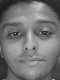

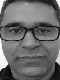

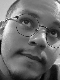

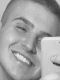

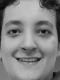

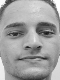

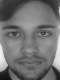

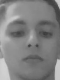

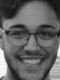

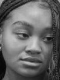

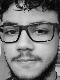

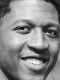

In [ ]:
  ids, faces = get_image_data()

In [ ]:
# Eigenfaces

eigen_classifier = cv2.face.EigenFaceRecognizer_create()
eigen_classifier.train(faces, ids)
eigen_classifier.write('/content/sample_data/eigen_classifier.yml')


eigen_classifier = cv2.face.EigenFaceRecognizer_create()
eigen_classifier.read('/content/sample_data/eigen_classifier.yml')


imagem_teste = '/content/teste/ra2019.jpg'

face, imagem = detecta_face(network,imagem_teste)

face, face.shape

(array([[ 46,  44,  48, ...,  58,  51,  59],
        [ 58,  63,  42, ...,  58,  50,  56],
        [ 67,  60,  54, ...,  37,  47,  56],
        ...,
        [182, 175, 169, ..., 165, 168, 167],
        [177, 181, 186, ..., 163, 166, 164],
        [175, 176, 174, ..., 163, 161, 165]], dtype=uint8),
 (80, 60))

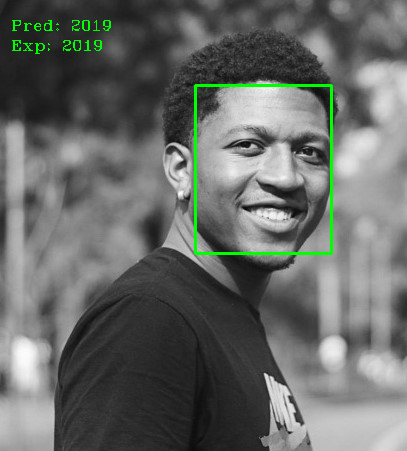

In [ ]:

previsao = eigen_classifier.predict(face)
previsao



saida_esperada = int(os.path.split(imagem_teste)[1].split('.')[0].replace('ra', ''))
saida_esperada


cv2.putText(imagem, 'Pred: ' + str(previsao[0]), (10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.8, (0,255,0))
cv2.putText(imagem, 'Exp: ' + str(saida_esperada), (10, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.8, (0,255,0))
cv2_imshow(imagem)

In [ ]:
def teste_reconhecimento(imagem_teste, classificador, show_conf = False):
  face, imagem_np = detecta_face(network, imagem_teste)
  previsao, conf = classificador.predict(face)
  saida_esperada = int(os.path.split(imagem_teste)[1].split('.')[0].replace('ra', ''))
  cv2.putText(imagem_np, 'Pred: ' + str(previsao), (10, 30), cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.8, (0,255,0))
  cv2.putText(imagem_np, 'Exp: ' + str(saida_esperada), (10, 50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.8, (0,255,0))
  if show_conf:
    print(conf)

  return imagem_np, previsao

0.0


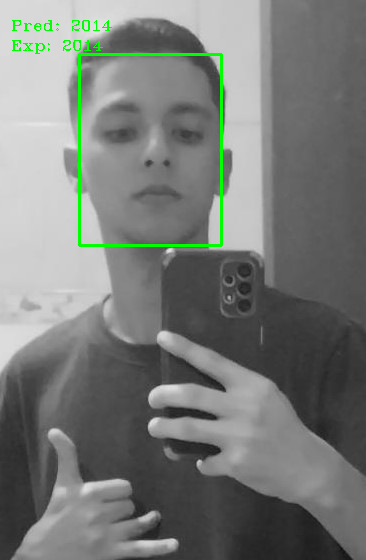

In [ ]:

imagem_teste = '/content/teste/ra2014.jpg'
imagem_np, previsao = teste_reconhecimento(imagem_teste, eigen_classifier, True)
cv2_imshow(imagem_np)

In [ ]:
# Avaliação do algoritimo

def avalia_algoritmo(paths, classificador):
  previsoes = []
  saidas_esperadas = []
  for path in paths:
    if path == "/content/teste/.ipynb_checkpoints":
      continue
    face, imagem = detecta_face(network, path)
    previsao, conf = classificador.predict(face)
    saida_esperada = int(os.path.split(path)[1].split('.')[0].replace('ra', ''))
    previsoes.append(previsao)
    saidas_esperadas.append(saida_esperada)
  return np.array(previsoes), np.array(saidas_esperadas)

In [ ]:
paths_teste = [os.path.join('/content/teste', f) for f in os.listdir('/content/teste')]
print(paths_teste)

['/content/teste/ra2012.jpg', '/content/teste/ra2013.jpg', '/content/teste/ra2018.jpg', '/content/teste/.ipynb_checkpoints', '/content/teste/ra2020.jpg', '/content/teste/ra2017.jpg', '/content/teste/ra2016.jpg', '/content/teste/ra2010.jpg', '/content/teste/ra2014.jpg', '/content/teste/ra2010.sorrindo.jpg', '/content/teste/ra2015.jpg', '/content/teste/ra2011.jpg', '/content/teste/ra2019.jpg']


In [ ]:
previsoes, saidas_esperadas = avalia_algoritmo(paths_teste, eigen_classifier)

previsoes

array([2012, 2013, 2018, 2020, 2017, 2016, 2010, 2014, 2010, 2015, 2011,
       2019])

In [ ]:
saidas_esperadas

array([2012, 2013, 2018, 2020, 2017, 2016, 2010, 2014, 2010, 2015, 2011,
       2019])

In [ ]:
# Acuracia

from sklearn.metrics import accuracy_score
accuracy_score(saidas_esperadas, previsoes)

1.0

In [ ]:
# Matriz de correlação

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(saidas_esperadas, previsoes)
cm

array([[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

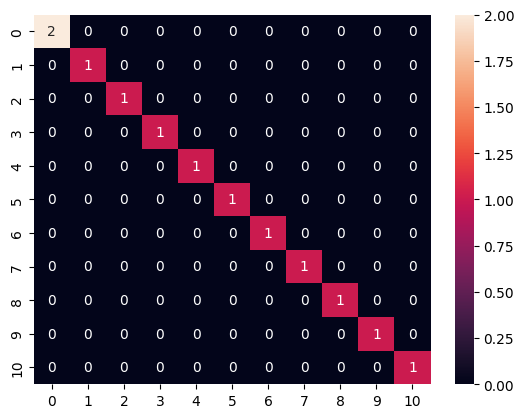

In [ ]:

import seaborn
seaborn.heatmap(cm, annot=True);